In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Replace 'dataset.csv' with the correct path to your CSV file
file_path_weather = 'dataset/weather_features.csv'
df_weather = pd.read_csv(file_path_weather)

In [3]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [4]:
df_weather.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

- dt_iso = data e ora compresa di fuso orario
- city_name = nome città
- temp = temperatura media misurata in Kelvin
- temp_min = temperatura minima misurata in Kelvin
- temp_max = temperatura massima misurata in Kelvin
- pressure = pressione misurata in Pascal
- humidity = umidità
- wind_speed = velocità del vento
- wind_deg = direzione del vento
- rain_1h = mm di acqua piovuta nell'ultima ora
- rain_3h = mm di acqua piovuta nelle ultime 3 ore
- snow_3h = mm di neve caduti nelle ultime 3 ore
- clouds_all = nuvole in cielo
- weather_id = codice che indica il tempo
- weather_main = nome associato al codice
- weather_description = descrizione del tempo
- weather_icon =

In [5]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [6]:
df_weather["temp_Celsius"] = df_weather.temp - 273.15
df_weather["temp_min_Celsius"] = df_weather.temp_min - 273.15
df_weather["temp_max_Celsius"] = df_weather.temp_max - 273.15
df_weather.drop(columns = ['temp', 'temp_min', 'temp_max'], inplace = True)
df_weather

,dt_iso,city_name,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,temp_Celsius,temp_min_Celsius,temp_max_Celsius
0,2015-01-01 00:00:00+01:00,Valencia,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-2.675,-2.675,-2.675
1,2015-01-01 01:00:00+01:00,Valencia,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-2.675,-2.675,-2.675
2,2015-01-01 02:00:00+01:00,Valencia,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-3.464,-3.464,-3.464
3,2015-01-01 03:00:00+01:00,Valencia,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-3.464,-3.464,-3.464
4,2015-01-01 04:00:00+01:00,Valencia,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-3.464,-3.464,-3.464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n,14.610,14.000,15.000
178392,2018-12-31 20:00:00+01:00,Seville,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n,12.610,12.000,13.000
178393,2018-12-31 21:00:00+01:00,Seville,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n,12.000,12.000,12.000
178394,2018-12-31 22:00:00+01:00,Seville,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n,11.000,11.000,11.000


In [7]:
df_weather["pressure_atm"] = round(df_weather.pressure / 1013.25, 3)
df_weather.drop(columns = ['pressure'], inplace = True)
df_weather.head(50)

,dt_iso,city_name,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure_atm
0,2015-01-01 00:00:00+01:00,Valencia,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-2.675000,-2.675000,-2.675000,0.988
1,2015-01-01 01:00:00+01:00,Valencia,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-2.675000,-2.675000,-2.675000,0.988
2,2015-01-01 02:00:00+01:00,Valencia,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-3.464000,-3.464000,-3.464000,0.989
3,2015-01-01 03:00:00+01:00,Valencia,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-3.464000,-3.464000,-3.464000,0.989
4,2015-01-01 04:00:00+01:00,Valencia,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-3.464000,-3.464000,-3.464000,0.989
5,2015-01-01 05:00:00+01:00,Valencia,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-2.858000,-2.858000,-2.858000,0.991
6,2015-01-01 06:00:00+01:00,Valencia,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-2.858000,-2.858000,-2.858000,0.991
7,2015-01-01 07:00:00+01:00,Valencia,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n,-2.858000,-2.858000,-2.858000,0.991
8,2015-01-01 08:00:00+01:00,Valencia,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d,1.451000,1.451000,1.451000,0.992
9,2015-01-01 09:00:00+01:00,Valencia,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d,1.451000,1.451000,1.451000,0.992


In [8]:
df_weather[df_weather.weather_description !='sky is clear']
df_weather.weather_main.unique()

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [9]:
df_weather['weather_description'].unique()

replace_weather_main={
    "clear":0,
    "clouds":1,
    "rain":2,
    "mist":3,
    "thunderstorm":4,
    "drizzle":5,
    "fog":6,
    "smoke":7,
    "haze":8,
    "snow":9,
    "dust":10,
    "squall":11    
}

df_weather['weather_main'].replace(replace_weather_main,inplace=True)

In [10]:
df_weather.T

,0,1,2,3,4,5,6,7,8,9,...,178386,178387,178388,178389,178390,178391,178392,178393,178394,178395
dt_iso,2015-01-01 00:00:00+01:00,2015-01-01 01:00:00+01:00,2015-01-01 02:00:00+01:00,2015-01-01 03:00:00+01:00,2015-01-01 04:00:00+01:00,2015-01-01 05:00:00+01:00,2015-01-01 06:00:00+01:00,2015-01-01 07:00:00+01:00,2015-01-01 08:00:00+01:00,2015-01-01 09:00:00+01:00,...,2018-12-31 14:00:00+01:00,2018-12-31 15:00:00+01:00,2018-12-31 16:00:00+01:00,2018-12-31 17:00:00+01:00,2018-12-31 18:00:00+01:00,2018-12-31 19:00:00+01:00,2018-12-31 20:00:00+01:00,2018-12-31 21:00:00+01:00,2018-12-31 22:00:00+01:00,2018-12-31 23:00:00+01:00
city_name,Valencia,Valencia,Valencia,Valencia,Valencia,Valencia,Valencia,Valencia,Valencia,Valencia,...,Seville,Seville,Seville,Seville,Seville,Seville,Seville,Seville,Seville,Seville
humidity,77,77,78,78,78,71,71,71,71,71,...,59,51,48,42,42,54,62,58,57,70
wind_speed,1,1,0,0,0,2,2,2,1,1,...,5,5,5,4,4,3,3,4,4,3
wind_deg,62,62,23,23,23,321,321,321,307,307,...,60,40,50,50,60,30,30,50,60,50
rain_1h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rain_3h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snow_3h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clouds_all,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
weather_id,800,800,800,800,800,800,800,800,800,800,...,800,800,800,800,800,800,800,800,800,800


/tmp/ipykernel_11613/3338391940.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df_weather.corr()


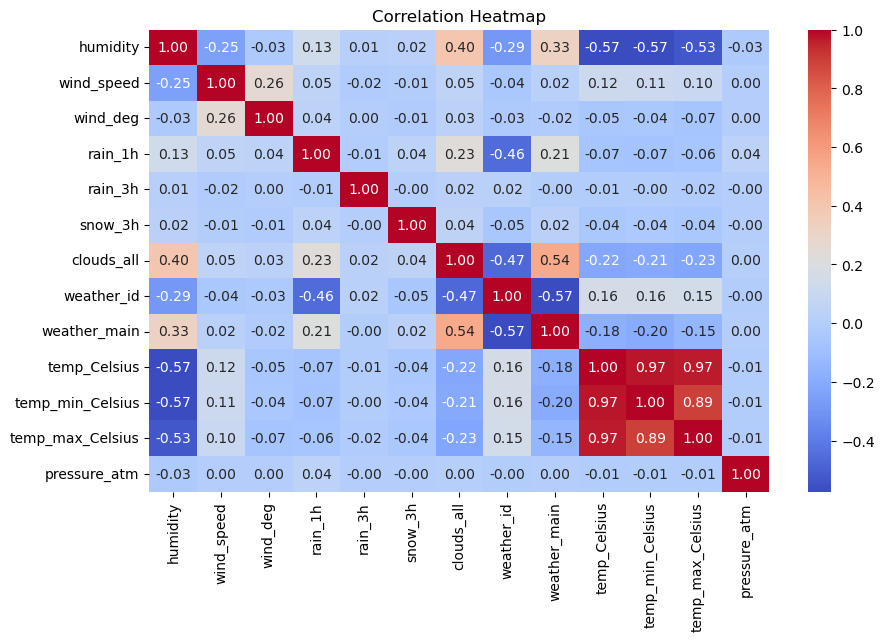

In [11]:
corr2 = df_weather.corr()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
new_column_order = ['city_name', 'year', 'month', 'day', 'hour', 'temp_Celsius', 'temp_min_Celsius', 'temp_max_Celsius',
                    'pressure_atm', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h','clouds_all',
                    'weather_id', 'weather_main', 'weather_description','weather_icon']
df_weather = df_weather.reindex(columns = new_column_order)
df_weather

,city_name,year,month,day,hour,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure_atm,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,Valencia,NaN,NaN,NaN,NaN,-2.675,-2.675,-2.675,0.988,77,1,62,0.0,0.0,0.0,0,800,0,sky is clear,01n
1,Valencia,NaN,NaN,NaN,NaN,-2.675,-2.675,-2.675,0.988,77,1,62,0.0,0.0,0.0,0,800,0,sky is clear,01n
2,Valencia,NaN,NaN,NaN,NaN,-3.464,-3.464,-3.464,0.989,78,0,23,0.0,0.0,0.0,0,800,0,sky is clear,01n
3,Valencia,NaN,NaN,NaN,NaN,-3.464,-3.464,-3.464,0.989,78,0,23,0.0,0.0,0.0,0,800,0,sky is clear,01n
4,Valencia,NaN,NaN,NaN,NaN,-3.464,-3.464,-3.464,0.989,78,0,23,0.0,0.0,0.0,0,800,0,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,Seville,NaN,NaN,NaN,NaN,14.610,14.000,15.000,1.015,54,3,30,0.0,0.0,0.0,0,800,0,sky is clear,01n
178392,Seville,NaN,NaN,NaN,NaN,12.610,12.000,13.000,1.016,62,3,30,0.0,0.0,0.0,0,800,0,sky is clear,01n
178393,Seville,NaN,NaN,NaN,NaN,12.000,12.000,12.000,1.015,58,4,50,0.0,0.0,0.0,0,800,0,sky is clear,01n
178394,Seville,NaN,NaN,NaN,NaN,11.000,11.000,11.000,1.016,57,4,60,0.0,0.0,0.0,0,800,0,sky is clear,01n


# Remove the columns that are not necessary

In [13]:
df_weather.drop(columns = ['weather_description','weather_icon'],inplace = True)
df_weather

,city_name,year,month,day,hour,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure_atm,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main
0,Valencia,NaN,NaN,NaN,NaN,-2.675,-2.675,-2.675,0.988,77,1,62,0.0,0.0,0.0,0,800,0
1,Valencia,NaN,NaN,NaN,NaN,-2.675,-2.675,-2.675,0.988,77,1,62,0.0,0.0,0.0,0,800,0
2,Valencia,NaN,NaN,NaN,NaN,-3.464,-3.464,-3.464,0.989,78,0,23,0.0,0.0,0.0,0,800,0
3,Valencia,NaN,NaN,NaN,NaN,-3.464,-3.464,-3.464,0.989,78,0,23,0.0,0.0,0.0,0,800,0
4,Valencia,NaN,NaN,NaN,NaN,-3.464,-3.464,-3.464,0.989,78,0,23,0.0,0.0,0.0,0,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,Seville,NaN,NaN,NaN,NaN,14.610,14.000,15.000,1.015,54,3,30,0.0,0.0,0.0,0,800,0
178392,Seville,NaN,NaN,NaN,NaN,12.610,12.000,13.000,1.016,62,3,30,0.0,0.0,0.0,0,800,0
178393,Seville,NaN,NaN,NaN,NaN,12.000,12.000,12.000,1.015,58,4,50,0.0,0.0,0.0,0,800,0
178394,Seville,NaN,NaN,NaN,NaN,11.000,11.000,11.000,1.016,57,4,60,0.0,0.0,0.0,0,800,0


In [ ]:
combined_df_waether_2 = df_weather.drop(columns=['year', 'month', 'day', 'hour', 'city_name', 'weather_main'])
corr1 = combined_df_waether_2.corr()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'sky is clear'

# Remove Redundent variables

In [ ]:
df_copy = df_weather.copy()

In [ ]:
# Create an instance of the LabelEncoder class
label_encoder = LabelEncoder()
# Encode the condition column using LabelEncoder
df_copy['weather_main'] = label_encoder.fit_transform(df_copy['weather_main'])
df_copy

,city_name,year,month,day,hour,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure_atm,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main
0,Valencia,2014,12,31,23,-2.675,-2.675,-2.675,0.988,77,1,62,0.0,0.0,0.0,0,800,0
1,Valencia,2015,1,1,0,-2.675,-2.675,-2.675,0.988,77,1,62,0.0,0.0,0.0,0,800,0
2,Valencia,2015,1,1,1,-3.464,-3.464,-3.464,0.989,78,0,23,0.0,0.0,0.0,0,800,0
3,Valencia,2015,1,1,2,-3.464,-3.464,-3.464,0.989,78,0,23,0.0,0.0,0.0,0,800,0
4,Valencia,2015,1,1,3,-3.464,-3.464,-3.464,0.989,78,0,23,0.0,0.0,0.0,0,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,Seville,2018,12,31,18,14.610,14.000,15.000,1.015,54,3,30,0.0,0.0,0.0,0,800,0
178392,Seville,2018,12,31,19,12.610,12.000,13.000,1.016,62,3,30,0.0,0.0,0.0,0,800,0
178393,Seville,2018,12,31,20,12.000,12.000,12.000,1.015,58,4,50,0.0,0.0,0.0,0,800,0
178394,Seville,2018,12,31,21,11.000,11.000,11.000,1.016,57,4,60,0.0,0.0,0.0,0,800,0


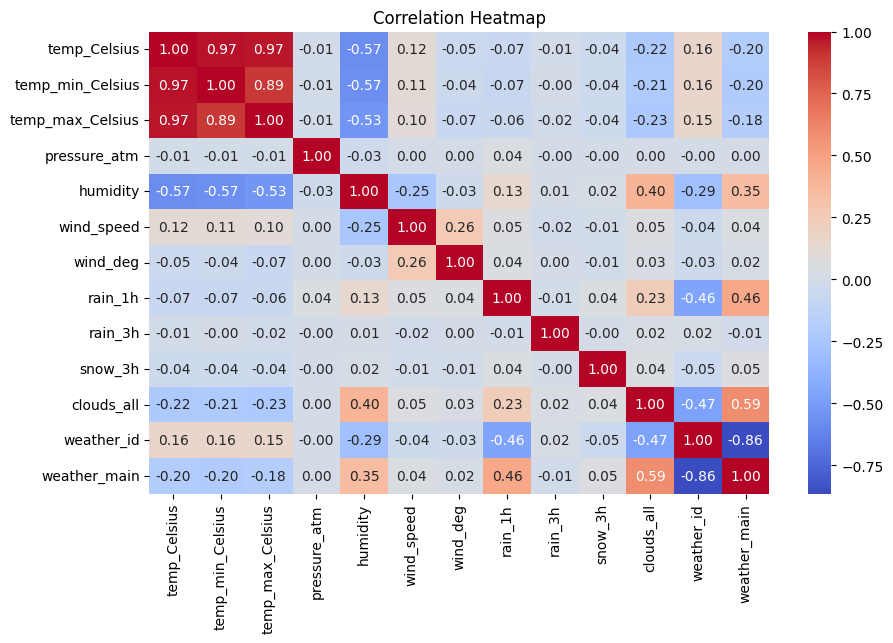

In [ ]:
combined_df_waether_2 = df_copy.drop(columns=['year', 'month', 'day', 'hour', 'city_name'])
corr2 = combined_df_waether_2.corr()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

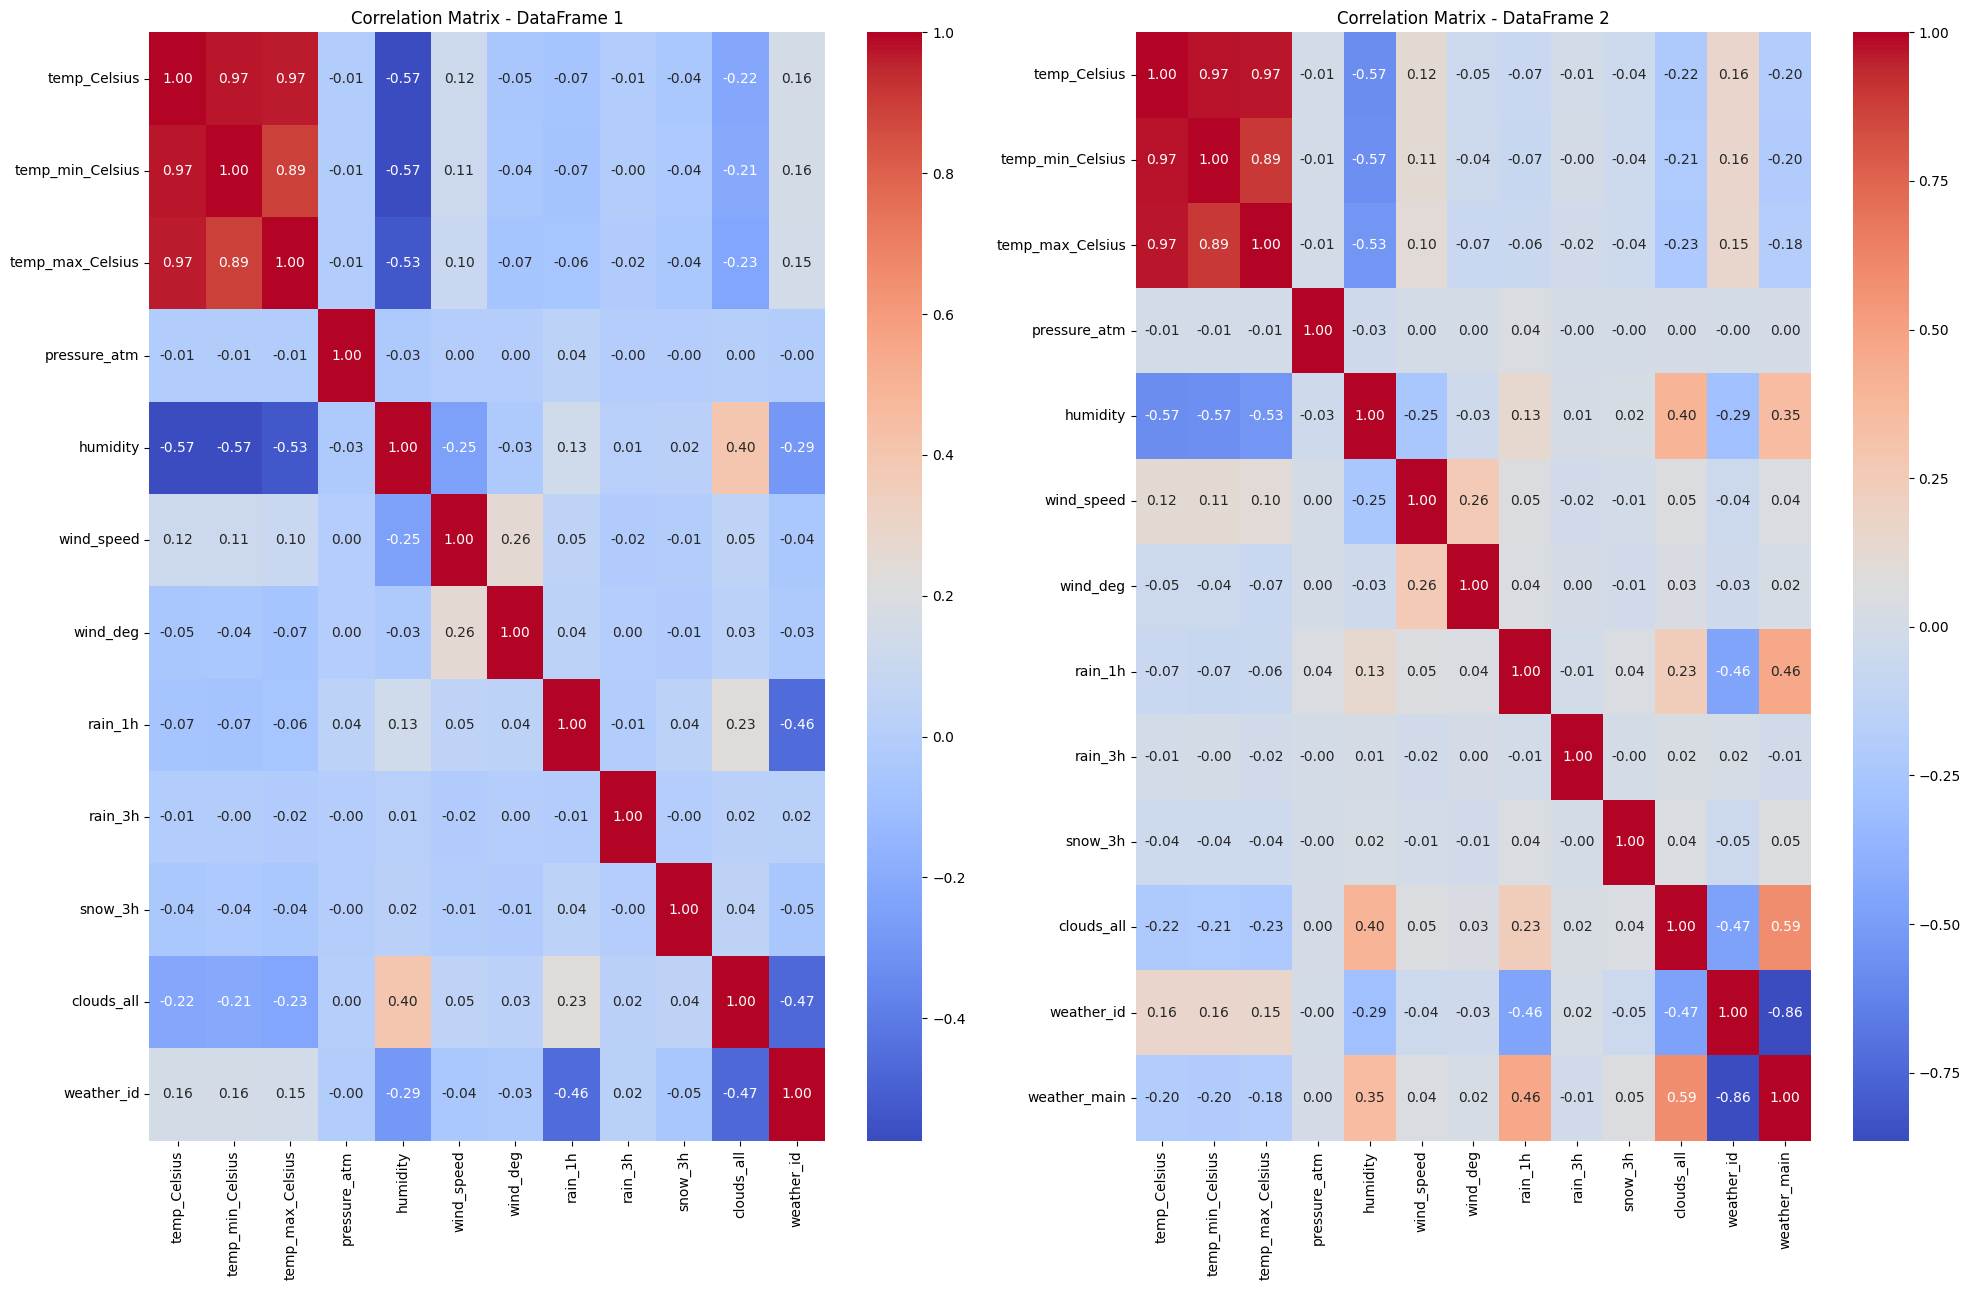

In [ ]:
# Calcola le matrici di correlazione per i tuoi dati (df1 e df2 sono i tuoi DataFrame)
combined_df_waether_2 = df_weather.drop(columns=['year', 'month', 'day', 'hour', 'city_name', 'weather_main'])
corr1 = combined_df_waether_2.corr()
corr_matrix_df1 = corr1
combined_df_waether_2 = df_weather.drop(columns=['year', 'month', 'day', 'hour', 'city_name'])
corr2 = combined_df_waether_2.corr()
corr_matrix_df2 = corr2

# Crea una figura con due subplots affiancati
fig, axes = plt.subplots(1, 2, figsize=(20, 13))

# Disegna la prima matrice di correlazione
sns.heatmap(corr_matrix_df1, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, ax=axes[0])
axes[0].set_title('Correlation Matrix - DataFrame 1')

# Disegna la seconda matrice di correlazione
sns.heatmap(corr_matrix_df2, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, ax=axes[1])
axes[1].set_title('Correlation Matrix - DataFrame 2')

# Regola lo spazio tra i subplots
plt.tight_layout()

# Mostra il plot
plt.show()


# Some plots

In [ ]:
# Filter the data to include only the rows where the year is 2015
#d_weather_2015 = d_weather[d_weather["dt_iso"].dt.year == 2015]

# Plot rain_1h for the year 2015
#plt.figure(figsize=(12, 6))
#plt.plot(d_weather_2015["dt_iso"], d_weather_2015["rain_1h"], label='Rainfall (1h)')
#plt.xlabel('Date')
#plt.ylabel('Rainfall (mm)')
#plt.title('Hourly Rainfall Over Time in 2015')
#plt.legend()
#plt.grid(True)
#plt.show()

In [14]:
def ci_sono_diversi(df, description, id):
    for i in description:
        for j in id:
            df[df.weather_description == i][df.weather_id == j]
            return True